In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import autogluon.core as ag
from autogluon.vision import ImagePredictor

In [3]:
train_dataset, _, test_dataset = ImagePredictor.Dataset.from_folders('~/data')
print(train_dataset)

                                                 image  label
0    /home/jupyter/data/train/BabyPants/BabyPants_1...      0
1    /home/jupyter/data/train/BabyPants/BabyPants_1...      0
2    /home/jupyter/data/train/BabyPants/BabyPants_1...      0
3    /home/jupyter/data/train/BabyPants/BabyPants_1...      0
4    /home/jupyter/data/train/BabyPants/BabyPants_1...      0
..                                                 ...    ...
795  /home/jupyter/data/train/womenchiffontop/women...      3
796  /home/jupyter/data/train/womenchiffontop/women...      3
797  /home/jupyter/data/train/womenchiffontop/women...      3
798  /home/jupyter/data/train/womenchiffontop/women...      3
799  /home/jupyter/data/train/womenchiffontop/women...      3

[800 rows x 2 columns]


In [4]:
predictor = ImagePredictor()
# since the original dataset does not provide validation split, the `fit` function splits it randomly with 90/10 ratio
predictor.fit(train_dataset, hyperparameters={'epochs': 2})  # you can trust the default config, we reduce the # epoch to save some build time

INFO:root:`time_limit=auto` set to `time_limit=7200`.
INFO:root:Reset labels to [0, 1, 2, 3]
INFO:gluoncv.auto.tasks.image_classification:No GPU detected/allowed, using most conservative search space.
INFO:gluoncv.auto.tasks.image_classification:Randomly split train_data into train[710]/validation[90] splits.
INFO:gluoncv.auto.tasks.image_classification:Starting fit without HPO
INFO:ImageClassificationEstimator:modified configs(<old> != <new>): {
INFO:ImageClassificationEstimator:root.gpus            (0,) != ()
INFO:ImageClassificationEstimator:root.valid.batch_size 128 != 8
INFO:ImageClassificationEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:ImageClassificationEstimator:root.train.rec_train_idx ~/.mxnet/datasets/imagenet/rec/train.idx != auto
INFO:ImageClassificationEstimator:root.train.rec_train ~/.mxnet/datasets/imagenet/rec/train.rec != auto
INFO:ImageClassificationEstimator:root.train.epochs    10 != 2
INFO:ImageClassificationEstimator:root.train.early_stop_patience -

In [5]:
fit_result = predictor.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))

Top-1 train acc: 0.610, val acc: 0.809


In [6]:
test_acc, _ = predictor.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc)

Top-1 test acc: 0.700


In [7]:
image_path = test_dataset.iloc[0]['image']
result = predictor.predict(image_path)
print(result)

0    0
Name: label, dtype: int64


In [8]:
proba = predictor.predict_proba(image_path)
print(proba)

          0         1         2         3
0  0.637084  0.312147  0.048351  0.002418


In [9]:
bulk_result = predictor.predict(test_dataset)
print(bulk_result)

0     0
1     0
2     1
3     2
4     1
     ..
75    3
76    3
77    3
78    3
79    2
Name: label, Length: 80, dtype: int64


In [10]:
filename = 'predictor.ag'
predictor.save(filename)
predictor_loaded = ImagePredictor.load(filename)
# use predictor_loaded as usual
result = predictor_loaded.predict(image_path)
print(result)

0    0
Name: label, dtype: int64


# medium_quality_faster_train

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os

os.makedirs('checkpoint', exist_ok=True)

In [3]:
hyperparameters = {'model': 'resnet50_v1b', 'lr': 0.01, 
                   'batch_size': 64, 'epochs': 50, 'early_stop_patience': 5 }

hyperparameter_tune_kwargs = { 'num_trials': 8, 'search_strategy': 'random'}

time_limit = 1*3600

INFO:root:Reset labels to [0, 1, 2, 3]
INFO:gluoncv.auto.tasks.image_classification:No GPU detected/allowed, using most conservative search space.
INFO:gluoncv.auto.tasks.image_classification:Randomly split train_data into train[714]/validation[86] splits.
INFO:gluoncv.auto.tasks.image_classification:Starting HPO experiments


  0%|          | 0/8 [00:00<?, ?it/s]

INFO:ImageClassificationEstimator:modified configs(<old> != <new>): {
INFO:ImageClassificationEstimator:root.train.rec_val   ~/.mxnet/datasets/imagenet/rec/val.rec != auto
INFO:ImageClassificationEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:ImageClassificationEstimator:root.train.rec_train ~/.mxnet/datasets/imagenet/rec/train.rec != auto
INFO:ImageClassificationEstimator:root.train.data_dir  ~/.mxnet/datasets/imagenet != auto
INFO:ImageClassificationEstimator:root.train.batch_size 128 != 64
INFO:ImageClassificationEstimator:root.train.lr        0.1 != 0.01
INFO:ImageClassificationEstimator:root.train.num_training_samples 1281167 != -1
INFO:ImageClassificationEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:ImageClassificationEstimator:root.train.rec_val_idx ~/.mxnet/datasets/imagenet/rec/val.idx != auto
INFO:ImageClassificationEstimator:root.train.epochs    10 != 50
INFO:ImageClassificationEstimator:root.train.rec_train_idx ~/.mxnet/datasets/imagenet/rec/train.idx

INFO:ImageClassificationEstimator:Applying the state from the best checkpoint...
INFO:autogluon.core.scheduler.seq_scheduler:	Time limit exceeded
INFO:autogluon.core.scheduler.seq_scheduler:Saving Training Curve in checkpoint/plot_training_curves.png


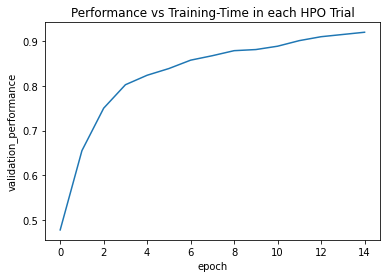

INFO:gluoncv.auto.tasks.image_classification:Finished, total runtime is 3633.26 s
INFO:gluoncv.auto.tasks.image_classification:{ 'best_config': { 'estimator': <class 'gluoncv.auto.estimators.image_classification.image_classification.ImageClassificationEstimator'>,
                   'gpus': [],
                   'img_cls': { 'batch_norm': False,
                                'last_gamma': False,
                                'model': 'resnet50_v1b',
                                'use_gn': False,
                                'use_pretrained': True,
                                'use_se': False},
                   'train': { 'batch_size': 64,
                              'crop_ratio': 0.875,
                              'data_dir': 'auto',
                              'dtype': 'float32',
                              'early_stop_baseline': -inf,
                              'early_stop_max_value': inf,
                              'early_stop_min_delta': 0.001,
        

RuntimeError: Unable to fit a usable model given `time_limit=3600`

In [4]:
import autogluon.core as ag
from autogluon.vision import ImagePredictor

train_dataset, _, test_dataset = ImagePredictor.Dataset.from_folders('~/data')

predictor = ImagePredictor()
predictor.fit(train_dataset, time_limit=time_limit,
              hyperparameters=hyperparameters,
              hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

In [16]:
fit_result = predictor.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))

KeyError: 'train_acc'

In [ ]:
test_acc, _ = predictor.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc)

In [ ]:
filename = 'predictor_mqft.ag'
predictor.save(filename)

# medium_quality_faster_inference

In [ ]:
from autogluon.core import Categorical, Real

hyperparameters = { 'model': Categorical('resnet18_v1b', 'mobilenetv3_small'), 
                   'lr': Categorical(0.01, 0.005, 0.001), 'batch_size': Categorical(64, 128),
                   'epochs': Categorical(50, 100), 'early_stop_patience': 10 }

hyperparameter_tune_kwargs = {'num_trials': 32, 'search_strategy': 'bayesopt'}

time_limit = 2*3600

In [ ]:
import autogluon.core as ag
from autogluon.vision import ImagePredictor

train_dataset, _, test_dataset = ImagePredictor.Dataset.from_folders('~/data')

predictor = ImagePredictor()
predictor.fit(train_dataset, time_limit=time_limit,
              hyperparameters=hyperparameters,
              hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

INFO:root:Reset labels to [0, 1, 2, 3]
INFO:gluoncv.auto.tasks.image_classification:No GPU detected/allowed, using most conservative search space.
INFO:gluoncv.auto.tasks.image_classification:Randomly split train_data into train[714]/validation[86] splits.
INFO:gluoncv.auto.tasks.image_classification:Starting HPO experiments


  0%|          | 0/8 [00:00<?, ?it/s]

INFO:ImageClassificationEstimator:modified configs(<old> != <new>): {
INFO:ImageClassificationEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:ImageClassificationEstimator:root.train.rec_train ~/.mxnet/datasets/imagenet/rec/train.rec != auto
INFO:ImageClassificationEstimator:root.train.batch_size 128 != 64
INFO:ImageClassificationEstimator:root.train.rec_train_idx ~/.mxnet/datasets/imagenet/rec/train.idx != auto
INFO:ImageClassificationEstimator:root.train.lr        0.1 != 0.01
INFO:ImageClassificationEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:ImageClassificationEstimator:root.train.early_stop_patience -1 != 5
INFO:ImageClassificationEstimator:root.train.num_training_samples 1281167 != -1
INFO:ImageClassificationEstimator:root.train.rec_val   ~/.mxnet/datasets/imagenet/rec/val.rec != auto
INFO:ImageClassificationEstimator:root.train.data_dir  ~/.mxnet/datasets/imagenet != auto
INFO:ImageClassificationEstimator:root.train.rec_val_idx ~/.mxnet/datasets/imagenet/re


100%|██████████| 55344/55344 [00:01<00:00, 30765.73KB/s]
INFO:ImageClassificationEstimator:Start training from [Epoch 0]
INFO:ImageClassificationEstimator:[Epoch 0] training: accuracy=0.319010
INFO:ImageClassificationEstimator:[Epoch 0] speed: 4 samples/sec	time cost: 249.218964
INFO:ImageClassificationEstimator:[Epoch 0] validation: top1=0.477500 top5=1.000000
INFO:ImageClassificationEstimator:[Epoch 0] Current best top-1: 0.477500 vs previous 0.000000, saved to /home/jupyter/machine-learning-playground/02.autogluon/01.quick_start/5398db56/.trial_0/best_checkpoint.pkl


In [ ]:
fit_result = predictor.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))

In [ ]:
test_acc, _ = predictor.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc)

In [ ]:
filename = 'predictor_mqft.ag'
predictor.save(filename)